In [117]:
import numpy as np
import pandas as pd
from astroquery.gaia import Gaia
from astroquery.simbad import Simbad
import matplotlib.pyplot as plt
from astropy.table import Column, join, Table, vstack, hstack
from astropy.io import ascii
from HMXB_pipeline_class import pipeline
import astropy.coordinates as coords
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style
import corner
from datetime import datetime
import os
import mw_plot

In [118]:

cwd = os.getcwd()
cwd

'/home/karan/Documents/UvA/Thesis/Code'

In [119]:
#constants
k  = 4.74 #km/s per mas/yr 

#solar values
# solar motion km/s 
# M. Carretero-Castrillo 2023 and Ried 2019
#km/s
U_sun = 10.8
V_sun = 13.6
W_sun = 7.6

global U_sun, V_sun, W_sun, k

today = datetime.now().strftime("%Y%m%d")

# Colors

In [120]:
    color_map = {
        "xkcd:blue": "O I-III",
        "xkcd:red": "B I-III",
        "xkcd:bright Blue": "Oe I-III",
        "xkcd:dark blue": "Oe IV-V",
        "xkcd:green": "B0e I-III",
        "xkcd:bright green": "B1e I-III",
        "xkcd:grass green": "B2e I-III",
        "xkcd:black": "OB IV-V",
        "xkcd:grey": "M,A,None",
        "xkcd:purple": "B0e IV-V",
        "xkcd:light purple": "B1e IV-V",
        "xkcd:dark purple": "B2e IV-V",
    }
    groups = [
        ("O I-III", ['xkcd:blue'], 'xkcd:blue'),
        ("B I-III", ['xkcd:red'], 'xkcd:red'),
        ("Oe", ['xkcd:bright Blue', 'xkcd:dark blue'], 'xkcd:cobalt'),
        ("Be I-III", ['xkcd:green', 'xkcd:bright green', 'xkcd:dark green'], 'xkcd:green')
    ]
    marker_map = {
        "xkcd:blue": 'o',   # Circle marker for "O I-III"
        "xkcd:red":'o',    # Circle marker for "B I-III"
        "xkcd:bright Blue": '^',  # Triangle marker for "Oe I-III"
        "xkcd:dark blue":'^',  # Triangle marker for "Oe IV-V"
        "xkcd:green": '^',  # Circle marker for "B0e I-III"
        "xkcd:bright green": '^',  # Circle marker for "B1e I-III"
        "xkcd:grass green":'^',  # Circle marker for "B2e I-III"
        "xkcd:black": 'x',   # Cross marker for "OB IV-V"
        "xkcd:grey": 'x',  # Cross marker for "M,A,None"
        "xkcd:purple": '^',  # Circle marker for "B0e IV-V"
        "xkcd:light purple": '^',  # Circle marker for "B1e IV-V"
        "xkcd:dark purple": '^'  # Circle marker for "B2e IV-V"
    }

# Read the Data
## DO NOT EDIT THIS FILE

In [121]:
#get the location of the data files
home_files = os.path.dirname(cwd)
home_files = home_files + '/'
csv_files  = home_files
csv_files

'/home/karan/Documents/UvA/Thesis/'

In [122]:
HMXB_gaia = ascii.read(csv_files+'GAIA_HMXB_DNE.ecsv',format='ecsv')
HMXB_gaia

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465
427234969757165952,9.290132580203235,0.008413794,61.36013319063004,0.009818237,-1.7956235405295953,0.010947091,-0.5251300483100196,0.013608978,0.27189066538368456,0.012059882,nan,nan,9.454656,121.22141620023214,-1.4641898756122689,9.768971,8.949126,0.8198452
444752973131169664,53.749629724978455,0.013929484,53.17313997828423,0.012730369,-0.26805266659388,0.019742586,0.4401283844933388,0.019827945,0.13434727271763658,0.020151323,nan,nan,14.200214,146.05208942276994,-2.1940257086354467,15.475269,13.086571,2.3886986


In [123]:
HMXB_pipeline = pipeline(csv_files+'GAIA_HMXB_DNE.ecsv', fmt='ecsv')
HMXB_table = HMXB_pipeline.lay_pipe(filename=csv_files+'HMXB_with_analysis.ecsv',filetype='ascii.ecsv')

In [124]:
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,-4.8164893827016515,0.0058944434132315315
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,1.8464936849682976,-0.01668983515155678
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,0.08538307654964422,-0.07654192085924438
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,0.06229471894967609,-0.47301969013360023
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,-0.9451534592058328,-0.08616626715350759
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
427234969757165952,9.290132580203235,0.008413794,61.36013319063004,0.009818237,-1.7956235405295953,0.010947091,-0.5251300483100196,0.013608978,0.27189066538368456,0.012059882,nan,nan,9.454656,121.22141620023214,-1.4641898756122689,9.768971,8.949126,0.8198452,3.677948996847052,-1.8178140519374264,-0.4422414945716403,10.870491734584071,225.41280416340064,148.84601654902679,0.934142743735759,-0.444641825789

# Add Spectral Type- Match by GAIA DR3 Identifer

In [125]:
HMSP_type = ascii.read(csv_files+'HMXB_sptype.csv',format='csv')
HMSP_type['GaiaDR3'].name= 'source_id'
HMSP_type = HMSP_type[~HMSP_type['source_id'].mask]
#HMSP_type
HMXB_table = join(HMXB_table, HMSP_type,keys='source_id')

In [126]:
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,-4.8164893827016515,0.0058944434132315315,B0Ve
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,1.8464936849682976,-0.01668983515155678,B0 IVpe
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,0.08538307654964422,-0.07654192085924438,B0e
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,0.06229471894967609,-0.47301969013360023,B1/2I[e]
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,-0.9451534592058328,-0.08616626715350759,B1-2 III/Ve
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,B0.5IVpe
427234969757165952,9.290132580203235,0.008413794,61.36013319063004,0.009818237,-1.7956235405295953,0.010947091,-0.5251300483100196,0.013608978,0.27189066538368456,0.012059882,nan,nan,9.454656,121.22141620023214,-1.4641898756122689,9.768971,8.949126,0.8198452,3.677948996847052,-1.8178140519374264,-0.4422414945716403,10.870491734584071,225.412804

In [127]:
HMXB_GAIA_ID = Table(HMXB_table['source_id'])
HMXB_GAIA_ID.write(csv_files+'HMXB_GAIA_ID.ecsv',format='ascii.ecsv',overwrite=True)

# Add Basic Spectral Type and Hand defined spectral type

In [128]:
def sp_color(sptype):
        sptype  = str(sptype)
        if sptype == None or sptype == '':
            return 'xkcd:grey'
        if sptype.startswith('O'):
             return 'xkcd:blue'
        elif sptype.startswith('B') and (sptype.endswith('e') or '[e]' in sptype):
            return 'xkcd:green'
        elif sptype.startswith('B'):
            return 'xkcd:red'
        else:
            return 'xkcd:grey'

In [129]:
#HMXB_table = ascii.read(f'HMXB_{today}_.csv',format='csv')

In [130]:
HMXB_modsp = ascii.read(csv_files+'HMXB_Mod_sptype.csv',format='csv')

In [131]:
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,-4.8164893827016515,0.0058944434132315315,B0Ve
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,1.8464936849682976,-0.01668983515155678,B0 IVpe
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,0.08538307654964422,-0.07654192085924438,B0e
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,0.06229471894967609,-0.47301969013360023,B1/2I[e]
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,-0.9451534592058328,-0.08616626715350759,B1-2 III/Ve
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,B0.5IVpe
427234969757165952,9.290132580203235,0.008413794,61.36013319063004,0.009818237,-1.7956235405295953,0.010947091,-0.5251300483100196,0.013608978,0.27189066538368456,0.012059882,nan,nan,9.454656,121.22141620023214,-1.4641898756122689,9.768971,8.949126,0.8198452,3.677948996847052,-1.8178140519374264,-0.4422414945716403,10.870491734584071,225.412804

# Make a histrogram and plot the data

In [132]:
HMXB_table = join(HMXB_table,HMXB_modsp,keys='source_id', join_type='left')
HMXB_table['SpColor'] = [sp_color(sptype) for sptype in HMXB_table['SpType']]
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType,Mod_SpType,SpColor
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str17,str10
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,-4.8164893827016515,0.0058944434132315315,B0Ve,xkcd:purple,xkcd:green
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,1.8464936849682976,-0.01668983515155678,B0 IVpe,xkcd:purple,xkcd:green
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,0.08538307654964422,-0.07654192085924438,B0e,xkcd:green,xkcd:green
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,0.06229471894967609,-0.47301969013360023,B1/2I[e],xkcd:green,xkcd:green
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,-0.9451534592058328,-0.08616626715350759,B1-2 III/Ve,xkcd:green,xkcd:green
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,B0.5IVpe,xkcd:purple,xkcd:green
427234969757165952,9.290132580203235,0.008413794,61.36013319063004,0.009818237,-1.7956235405295953,0.010947091,-0.5251300483100196,0.013608978,0.27189066538368456,0.012059882,nan

# Add the Masses of the Compact and Companion

Source: https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A+A/677/A134

In [133]:
#add compact massHMXB_table
# compact = ascii.read(csv_files+'HMXB_compact_mass.csv',format='csv')
# compact = compact[~compact['source_id'].mask]

fortin = ascii.read(csv_files+'Fortin_HMXB.csv')

In [134]:
fortin['Main_ID'].name = 'Name'
#fortin_mass = fortin_mass[~fortin_mass['']]

In [135]:
fortin

Name,RAdeg,DEdeg,PosErr,Pos_ref,Spectype,Spectype_ref,Class,Compact,Mx,Mx_err,Mx_ref,Mo,Mo_err,Mo_ref,Period,Period_err,Period_ref,Superorbital Period,Superorbital Period_err,Superorbital Period_ref,Eccentricity,Eccentricity_err,Eccentricity_ref,Spin_period,Spin_period_err,Spin_period_ref,RV,RV_err,RV_ref,Distance,Distance_err_lo,Distance_err_up,IGR_var,Swift_var,XMM_var,Chandra_var,Var,best_ID,AGILE_ID,AGILE_RA,AGILE_Dec,AGILE_err,AGILE_ref,HEAO_ID,HEAO_RA,HEAO_Dec,HEAO_err,HEAO_ref,UHURU4_ID,UHURU4_RA,UHURU4_Dec,UHURU4_err,UHURU4_ref,ARIEL3_ID,ARIEL3_RA,ARIEL3_Dec,ARIEL3_err,ARIEL3_ref,IGR_ID,IGR_RA,IGR_Dec,IGR_err,IGR_ref,2E_ID,2E_RA,2E_Dec,2E_err,2E_ref,ROSAT_ID,ROSAT_RA,ROSAT_Dec,ROSAT_err,ROSAT_ref,ROSATF_ID,ROSATF_RA,ROSATF_Dec,ROSATF_err,ROSATF_ref,FERMI_ID,FERMI_RA,FERMI_Dec,FERMI_err,FERMI_ref,SAX_ID,SAX_RA,SAX_Dec,SAX_err,SAX_ref,Swift_ID,Swift_RA,Swift_Dec,Swift_err,Swift_ref,XMM_ID,XMM_RA,XMM_Dec,XMM_err,XMM_ref,Chandra_ID,Chandra_RA,Chandra_Dec,Chandra_err,Chandra_ref,2MASS_ID,2MASS_RA,2MASS_Dec,2MASS_err,2MASS_ref,Gaia_ID,Gaia_RA,Gaia_Dec,Gaia_err,Gaia_ref
str23,float64,float64,float64,str19,str13,str19,str12,str3,float64,float64,str19,float64,float64,str19,float64,float64,str19,float64,float64,str19,float64,float64,str19,float64,float64,str19,float64,float64,str19,int64,int64,int64,str2,float64,int64,int64,str1,str28,str14,float64,float64,float64,str19,str10,float64,float64,float64,int64,str10,float64,float64,float64,int64,str11,float64,float64,float64,int64,str18,float64,float64,float64,int64,str7,float64,float64,float64,int64,str17,float64,float64,float64,str22,str22,float64,float64,float64,int64,str17,float64,float64,float64,int64,str21,float64,float64,float64,str19,str22,float64,float64,float64,str19,str21,float64,float64,float64,int64,str22,float64,float64,float64,str19,str23,float64,float64,float64,int64,float64,float64,float64,float64,str19
IGR J00370+6122,9.29013258020323,61.36013319063,2.3371651251283e-09,--,BN0.7 Ib,2014A&A...566A.131G,sg,NS,--,--,--,22.0,--,2014A&A...563A...1G,15.6649,0.0014,2021PASJ...73.1389U,--,--,--,0.48,0.03,2014A&A...563A...1G,674.0,--,2021PASJ...73.1389U,-80.0,3.0,2014A&A...563A...1G,3401,-171,186,Y,11.2534561157227,1,--,Y,Gaia DR3 427234969757165952,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,IGR J00370+6122,9.29,61.36,0.0328333338101705,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,IGR J00370+6122,9.256,61.338,0.0450000007947286,--,2SXPS J003709.6+612135,9.29002,61.35994,0.000750000013245477,--,4XMM J003709.8+612136,9.291179,61.360154,0.000375809166666667,--,--,--,--,--,--,2MASS J00370963+6121363,9.290125,61.360111,1.94444445272287e-05,--,4.27234969757166e+17,9.29013258020323,61.36013319063,2.3371651251283e-09,--
gam Cas,14.1774509982081,60.716722804712,5.09333246284061e-07,--,B0.5IVpe,2011ARep...55...31S,Be,--,--,--,--,13.0,0.0,2000A&A...364L..85H,203.371,0.089,2012A&A...537A..59N,--,--,--,0.26,0.035,2000A&A...364L..85H,--,--,--,-0.018,0.075,2012A&A...537A..59N,--,--,--,--,--,1,--,Y,Gaia DR3 426558460884582016,--,--,--,--,--,1H0053+604,14.0072,60.7605,0.127323956370791,--,--,--,--,--,--,3A 0053+604,14.1784,60.7203,0.0,--,gam Cas,14.161,60.703,0.0104999999205271,--,--,--,--,--,--,1WGA J0056.7+6042,14.1792,60.7168,0.00361111111111111,--,--,--,--,--,--,--,--,--,--,--,gamma Cas.,14.165,60.702,0.026666667064031,--,--,--,--,--,--,4XMM J005642.4+604300,14.176882,60.716688,0.000236031388888889,--,--,--,--,--,--,2MASS J00564251+6043002,14.177127,60.716743,8.05555532375971e-05,--,4.26558460884582e+17,14.1774509982081,60.716722804712,5.09333246284061e-07,--
EM* AS 14,18.9960406988403,59.1539448676557,3.05071447251572e-09,--,B2,1960IzKry..24..160B,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,2592,-140,156,--,--,0,--,--,Gaia DR3 414196617287885312,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,4XMM J011558.9+590913

In [136]:
fortin_mass = fortin['Name','Mx','Mx_err','Mo','Mo_err']

In [137]:
fortin_mass

Name,Mx,Mx_err,Mo,Mo_err
str23,float64,float64,float64,float64
IGR J00370+6122,--,--,22.0,--
gam Cas,--,--,13.0,0.0
EM* AS 14,--,--,--,--
2S 0114+650,--,--,16.0,2.0
4U 0115+634,--,--,17.5,--
IGR J01363+6610,--,--,12.5,--
RX J0146.9+6121,--,--,9.6,--
IGR J01583+6713,--,--,12.5,--
LS I+61 303,--,--,12.5,--


# Companion


In [138]:
# companion = ascii.read(csv_files+'HMXB_companion_mass-result.csv',format='csv')
# #rename masses
# companion['mass_flame'].name = 'Mass_companion'
# companion['mass_flame_lower'].name = 'M_companion_lower'
# companion['mass_flame_upper'].name= 'M_companion_upper'

In [139]:
# HMXB_table = join(HMXB_table,compact,keys='source_id',join_type='left')
# HMXB_table  = join(HMXB_table,companion,keys='source_id',join_type='left')
# HMXB_table

# Names
this is getting stupid add names to each source

In [30]:
HMXB_names = ascii.read(csv_files+"HMXB_names.csv",format='csv')

HMXB_names['GaiaDR3'].name = 'source_id'
HMXB_names = HMXB_names[~HMXB_names['source_id'].mask]


In [140]:
HMXB_table = join(HMXB_table,HMXB_names,keys='source_id',join_type='left')
#join the mass from fortin
HMXB_table = join(HMXB_table,fortin_mass,keys='Name',join_type='left')
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType,Mod_SpType,SpColor,Name,Mx,Mx_err,Mo,Mo_err
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,,,,,,,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str17,str10,str23,float64,float64,float64,float64
3441207615229815040,84.72739245821431,0.0202507,26.31577524440175,0.015788812,-0.5898287895613142,0.030902112,-2.879557993302878,0.01621094,0.5245380785708109,0.023250582,nan,nan,8.601999,181.44504956690048,-2.643537066457817,8.987547,8.0104475,0.9770994,1.9064392860183996,2.12603198111763,-2.0297143279424583,10.403915664294958,225.02622744453242,-4.5772627558119305,1.4743856024086786,-0.7832807603717467,-0.0025775251985549665,0.005181971135181485,12.762149422593925,0.6542239039075064,-1.2516155387058931,O9.7IIIe,xkcd:bright blue,xkcd:blue,1A 0535+262,--,--,20.0,--
5336957010898124160,170.23817252151974,0.008774158,-61.91670671055608,0.009544741,-5.421032061547652,0.012438164,1.3700031073878873,0.011767985,0.32925822598102933,0.011463728,nan,nan,11.589363,292.49852714674694,-0.8918067117070271,12.270934,10.759902,1.5110321,3.03712989104672,-5.567951674993604,-0.5122609408455543,7.8560253894545635,222.56671751604506,-220.47262223549708,-1.054611102383597,-0.5187441308440925,-5.428597657240247,-0.018013469887746873,13.18075554666247,0.9152570846302401,0.024496659886285126,O9.5Ve,xkcd:dark blue,xkcd:blue,1A 1118-61,--,--,--,--
5334851450481641088,176.86894042633617,0.0075419685,-61.953719225831875,0.008998829,-6.225580251990721,0.010414293,2.361537685037365,0.011920752,0.12669559944899778,0.010234012,nan,nan,12.255294,295.48972809721556,-0.00970401441105653,13.309616,11.227763,2.081853,7.892933964155221,-6.606609744728988,0.8291063820044122,8.763800120419218,223.52091675977692,-193.7528220168817,-0.4170130760677609,-0.20310608662182214,-5.372222021128227,2.7060920841833756e-05,49.25833635059616,-0.8173746475330006,1.0321854077053925,B2Iae,xkcd:dark green,xkcd:green,1E 1145.1-6141,1.7,0.3,14.0,4.0
6053076566300433920,183.31156879290245,0.012357388,-64.87513252303748,0.015193149,-5.95305662663964,0.015885808,0.449629791184431,0.020752924,0.26448691327892004,0.01766936,nan,nan,13.976889,298.89007133029565,-2.303521643360621,14.39801,13.351908,1.0461025,3.7809054051208566,-5.958118420264099,-0.37666303137996027,7.449418244846888,222.10444742848472,-219.8306787168525,-0.8942614068632253,-0.40872604268783935,-5.393397656845806,-0.06092405130983405,6.1364723359412885,0.3295406434449326,0.09298706261771314,B5V,xkcd:red,xkcd:red,1ES 1210-64.6,--,--,--,--
5255509901121774976,154.7315592681715,0.009345571,-58.94609420856299,0.0094385855,-6.454306520313594,0.013439312,2.256007949459996,0.0133516,0.2273178405234294,0.010232987,nan,nan,12.269231,284.351776705235,-1.6900802660463154,12.882478,11.495986,1.3864918,4.3991267807989365,-6.6488043210162475,-1.5940657536704546,8.547292409868648,223.3022676369862,-212.96405708690497,-0.6634443517918205,-0.34946803248438035,-5.444675837248132,0.0016679885391937266,28.32721701626133,-0.5406841319762945,-1.2462657097252678,O6V((f)),xkcd:blue,xkcd:blue,1FGL J1018.6-5856,2.0,--,22.9,--
1979911002134040960,330.4091919702234,0.011207036,50.16795238313883,0.011057302,2.364625293266044,0.014718983,-0.2937024864956449,0.013353956,0.8781947661310571,0.013396814,nan,nan,9.304606,97.24776932144769,-4.04120

In [145]:
cyg = HMXB_table[HMXB_table['Name'] == 'Cyg X-1']

In [146]:
cyg

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType,Mod_SpType,SpColor,Name,Mx,Mx_err,Mo,Mo_err
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,,,,,,,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str17,str10,str23,float64,float64,float64,float64
2059383668236814720,299.59029482904185,0.010937963,35.201578765113695,0.01300258,-3.812385175624448,0.014573607,-6.309893239635542,0.017452912,0.44390196847449304,0.014949423,nan,nan,8.536617,71.33495940203416,3.0668344499402203,9.073668,7.8143406,1.2593269,2.252749640729428,-7.3714385326728324,-0.1045341185716774,8.06669761991884,222.79726524159187,220.06804751891272,0.5506169428852649,-0.6288474104939684,-5.399029766013547,-0.056094852708723615,27.644626713774468,-2.52302570954455,0.5804081446310146,O9.7Iabpvar,xkcd:blue,xkcd:blue,Cyg X-1,21.2,2.2,40.6,7.7


In [147]:
HMXB_table.write(home_files+f'HMXB_{today}_.csv',format='csv',overwrite=True)

In [33]:
def plot_peculiar(table):
    '''OUTDATED'''
    #large_mask = table['Peculiar Velocity'] <= 400
   # table = table[large_mask]
    v_thres = 40 #km/s threshold peculiar velocity
    prlx_mask = table['parallax']/table['parallax_error'] >=5.0
    table = table[prlx_mask] 
    
    V_pec = table['Peculiar Velocity']
    long = table['l']
    color = table['SpColor']
    

    fig, axs = plt.subplots(1,2, figsize=(15,8))
    for long_data, V_pec_data, color in zip(long, V_pec, color):
        axs[0].scatter(long_data, V_pec_data,c=color)
    axs[0].scatter([], [], color='blue', label='O')
    axs[0].scatter([], [], color='green', label='Be')
    axs[0].scatter([], [], color='red', label='B')

    axs[0].set_xlabel('Longitude (deg)')
    axs[0].set_ylabel("Peculiar Tangental Velocity")
    axs[0].axhline(y=v_thres,color='tab:orange')
    axs[0].legend(title='Spectral Type')
    #axs[0].set_ylim(-200,200)

    #histrogram
    # Filter V_pec values based on star types
    blue_mask = table['SpColor'] == 'blue'
    red_mask = table['SpColor'] == 'red'
    green_mask = table['SpColor'] == 'green'
    
    V_pec_O = table['Peculiar Velocity'][blue_mask]
    V_pec_Be = table['Peculiar Velocity'][green_mask]
    V_pec_B =  table['Peculiar Velocity'][red_mask]
    #print(len(V_pec_O),len(V_pec_Be),len(V_pec_B))
    # Histogram for V_pec based on star type
    bin_size = 10
    axs[1].hist(V_pec_O, bins=bin_size,  alpha=0.5, edgecolor='black', color='blue', label='O')
    axs[1].hist(V_pec_Be, bins=bin_size, alpha=0.4, edgecolor='black', color='green', label='Be')
    axs[1].hist(V_pec_B, bins= bin_size, alpha=0.5, edgecolor='black', color='red', label='B')
    
    axs[1].set_ylabel("Count")
    axs[1].set_xlabel('Peculiar Tangential Velocity')
    axs[1].legend(title="Spectral Type")

   # fig.colorbar(v_pec_plot,label='bp_rp')
    return None
#plot_peculiar(HMXB_table)

In [34]:
max_vpec_mask =HMXB_table['Peculiar Velocity'].argmax()
max_vpec_data = HMXB_table[max_vpec_mask]
max_vpec_data

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType,Mod_SpType,SpColor,Mass_compact,M_compact_lower,M_compact_upper,Mass_companion,M_companion_lower,M_companion_upper,Name
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,,,,,,,,,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str17,str10,float64,float64,float64,float64,float64,float64,str23
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,B0.5IVpe,xkcd:purple,xkcd:green,--,--,--,--,--,--,gam Cas


'/home/karan/Documents/UvA/Thesis/Code'

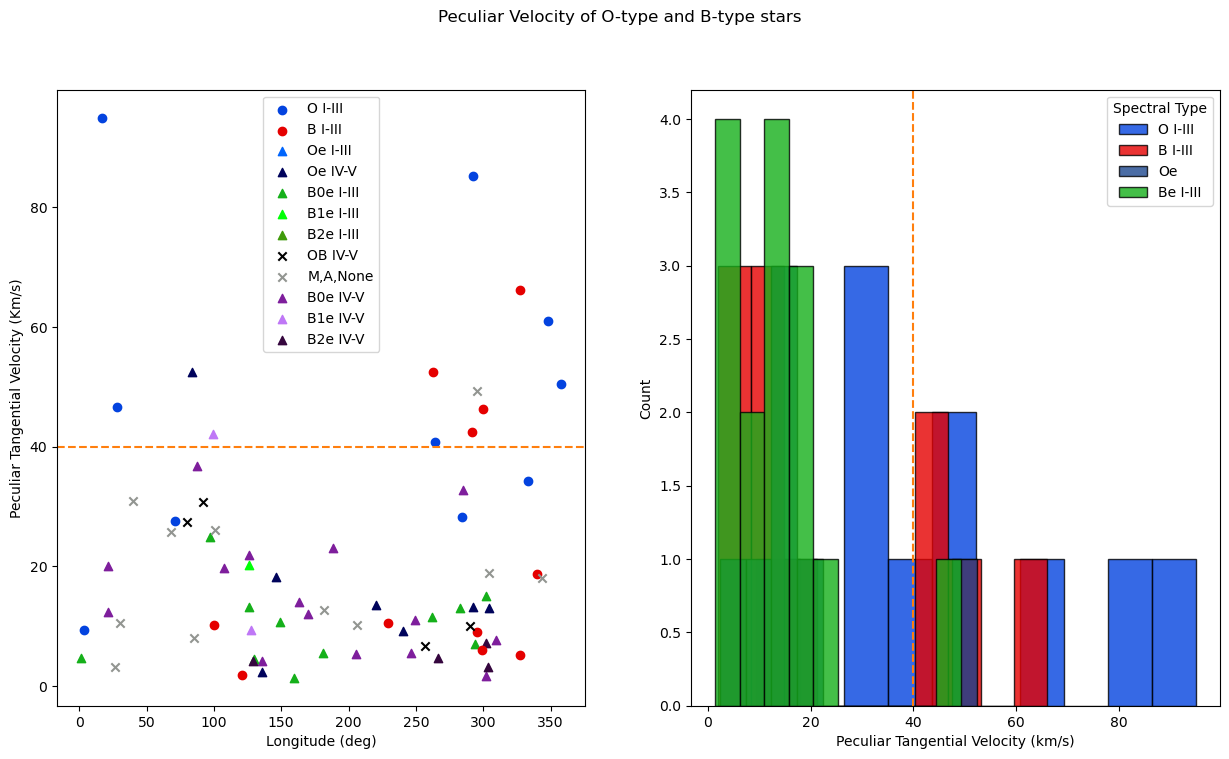

In [40]:

def plot_peculiar2(table,figname):
    prlx_mask = table['parallax']/table['parallax_error'] >=5.0
    table = table[prlx_mask] 
    
    V_pec = table['Peculiar Velocity']
    #V_pec = table['Peculiar Velocity']
    longitudes = table['l']
    mod_sptype = table['Mod_SpType']
    v_thres = 40  # km/s threshold peculiar velocity

    pec_mu_l = table['peculiar_mu_l']
    pec_mu_b = table['peculiar_mu_b']
    #Define a dictionary for color mapping


    # Plot scatter plot with colors based on Mod_SpType
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))
    
    for lon, vel, sp_type, pec_l, pec_b in zip(longitudes, V_pec, mod_sptype,pec_mu_l,pec_mu_b):
        color = sp_type if sp_type in color_map else 'xkcd:grey'
        marker = marker_map.get(sp_type, 'x') # Default marker for othersDefault marker for others
        axs[0].scatter(lon, vel, c=color,marker=marker)
        #axs[0].quiver([lon,vel],pec_l, pec_b,color='xkcd:black',angles='uv')
    
    # Add legend based on the color map
    for color, label in color_map.items():
        marker = marker_map.get(color,'x')
        axs[0].scatter([], [], color=color, label=label,marker=marker)
    
    axs[0].set_xlabel('Longitude (deg)')
    axs[0].set_ylabel("Peculiar Tangential Velocity (Km/s)")
    axs[0].axhline(y=v_thres, color='tab:orange', linestyle='--')
    axs[1].axvline(x=v_thres, color= 'tab:orange',linestyle='--')
    axs[0].legend()

    # Histogram of V_pec
    # Histogram for each group

    # Iterate over each group, filter, and plot
    for label, types, color in groups:
        V_pec_group = [vel for vel, sp_type in zip(V_pec, mod_sptype) if sp_type in types]
        
        if V_pec_group:
            bins = np.linspace(V_pec_group[0], V_pec_group[-1]).sort()
            axs[1].hist(V_pec_group, bins=bins, alpha=0.8, edgecolor='black', color=color, label=label)
            axs[1].legend()

    axs[1].set_ylabel("Count")
    axs[1].set_xlabel('Peculiar Tangential Velocity (km/s)')
    axs[1].legend(title="Spectral Type")
    # add arrows
    
    fig.suptitle("Peculiar Velocity of O-type and B-type stars")
    fig.savefig(home_files+'/Figures/'+f'{figname}_{today}.png')
    # plt.show()
    
    return None
plot_peculiar2(HMXB_table,'Peculiar_Velocity')

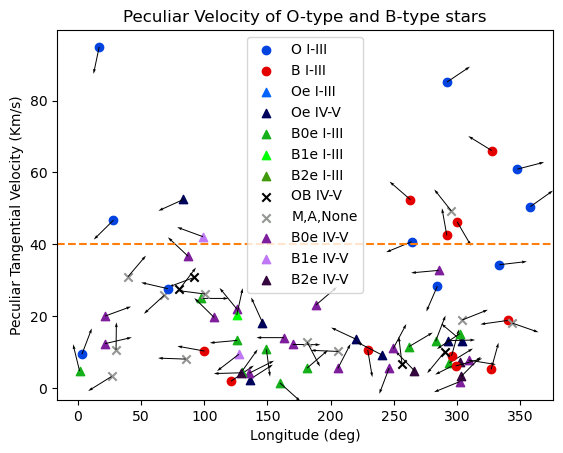

In [41]:
def plot_arrows(table):
    prlx_mask = table['parallax']/table['parallax_error'] >=5.0
    table = table[prlx_mask] 
    
    V_pec = table['Peculiar Velocity']
    #V_pec = table['Peculiar Velocity']
    longitudes = table['l']
    mod_sptype = table['Mod_SpType']
    v_thres = 40  # km/s threshold peculiar velocity

    pec_mu_l = table['peculiar_mu_l']
    pec_mu_b = table['peculiar_mu_b']
    #Define a dictionary for color mapping


    # Plot scatter plot with colors based on Mod_SpType
    #fig, axs = plt.subplots(1, 2, figsize=(15, 8))
    
    for lon, vel, sp_type, pec_l, pec_b in zip(longitudes, V_pec, mod_sptype,pec_mu_l,pec_mu_b):
        color = sp_type if sp_type in color_map else 'xkcd:grey'
        marker = marker_map.get(sp_type, 'x') # Default marker for othersDefault marker for others
        plt.scatter(lon, vel, c=color,marker=marker)
        plt.quiver(lon,vel,pec_l, pec_b,color='xkcd:black',angles='uv',width=0.002)
    
    # Add legend based on the color map
    for color, label in color_map.items():
        marker = marker_map.get(color,'x')
        plt.scatter([], [], color=color, label=label,marker=marker)
    
    plt.xlabel('Longitude (deg)')
    plt.ylabel("Peculiar Tangential Velocity (Km/s)")
    plt.axhline(y=v_thres, color='tab:orange', linestyle='--')
    plt.legend()


    plt.title("Peculiar Velocity of O-type and B-type stars")
    plt.savefig(home_files+'/Figures/'+f'arrows_{today}.png')
    # plt.show()
    
    return None
plot_arrows(HMXB_table)

# Mask negative Parallax

In [42]:
mask = HMXB_table['Peculiar Velocity'] <= 400
non_neg_HMXB_table = HMXB_table[mask]
#negative_mask = non_neg_HMXB_table["Peculiar Velocity"] >= 0
#non_neg_HMXB_table = non_neg_HMXB_table[negative_mask]

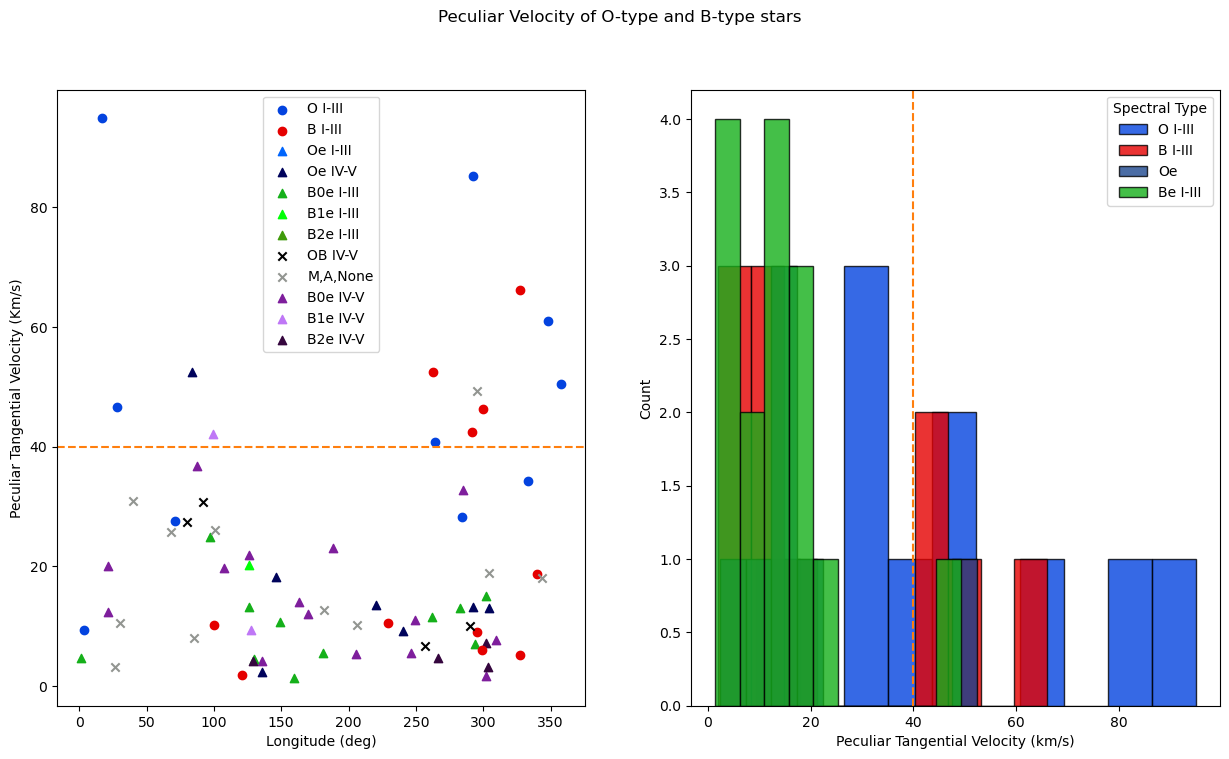

In [43]:
len(non_neg_HMXB_table)
plot_peculiar2(non_neg_HMXB_table,'Peculiar_velocity_slow')

In [44]:
negative_parallax_mask = HMXB_table['parallax'] <=0
negative_parallax = HMXB_table[negative_parallax_mask]
negative_parallax_ID = negative_parallax['source_id']
str_negative_parallax = ','.join(map(str,negative_parallax_ID))
str_negative_parallax

'4070968778561141760,4256500538116700160,4310118570535453696,4512787627579740032,5882543824607819776,5883218164517055488,5940576971716473344,5940777877435137024'

# Folloiwing Bailler Jones GAIA Dr3

https://dc.zah.uni-heidelberg.de/__system__/adql/query/form

These are sources with negative parallax
17 sources became 8

SELECT source_id, r_med_geo
FROM gedr3dist.main
 JOIN gaia.edr3lite USING(source_id)
WHERE source_id in (2028089540103670144,2070085317968809216,4040960662373474176,4070968778561141760,4256500538116700160,4306419980916246656,4309253392325650176,4310118570535453696,4310649153642824320,4512787627579740032,5854175187680510336,5882543824607819776,5883218164517055488,5934776158877214848,5940576971716473344,5940777877435137024,5980409632300781056)

# Exporting table

In [93]:
HMXB_table.write(home_files+"HMXB_practice_analysis.csv",format='csv',overwrite=True)

#export with units
HMXB_table.write(home_files+'HMXB_practice_analysis.ecsv', format='ascii.ecsv',overwrite=True)

# Check Data with HD153919
This is also a good check to see if my pipeline class works

In [47]:
# verify_pipeline = pipeline('GAIA_HMXB_DNE.ecsv', fmt='ecsv')
# verify_table = verify_pipeline.lay_pipe(filename='HMXB_with_analysis.ecsv',filetype='ascii.ecsv')

In [52]:
#HD153919_read = ascii.read("HD153919-result.ecsv",format='ecsv')
verify_pipeline = pipeline(home_files+'HD153919-result.ecsv',fmt='ecsv')
HD153919= verify_pipeline.lay_pipe(filename=home_files+'HD153919-result.ecsv',filetype='ascii.ecsv')

In [53]:
HD153919


source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,parallax_over_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l,pm_b,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,pm_l_poleski,pm_b_poleski,peculiar_mu_l,peculiar_mu_b
,deg,mas,deg,mas,mas / yr,mas / yr,,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,mas / yr,mas / yr
int64,float64,float32,float64,float32,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5976382915813535232,255.9865659301791,0.021049444,-37.8441202722809,0.012138224,2.4137032635492046,0.02806476,24.383919,5.021949969731823,0.021347089,0.6117358617075664,0.025948899,nan,nan,6.4204698,347.75444710988126,2.173492429913019,6.5759535,6.0885863,0.48736715,1.6346924589456862,5.455603348660082,1.1324032166355134,6.912338733878605,221.4552103876003,-57.26304804186743,-2.0108902079289996,-0.9425966257345032,-0.33697268535874947,0.05245861863101116,62.45548401686189,5.459355496184255,1.114173464609666,7.807218389472005,2.0043114717131583


In [56]:
HD3879_pipeline = pipeline(home_files+'HD 36879-result.ecsv',fmt='ecsv')
HD3879 =  HD3879_pipeline.lay_pipe(filename=home_files+'HD 36879.ecsv',filetype='ascii.ecsv')
HD3879

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,parallax_over_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b
,deg,mas,deg,mas,mas / yr,mas / yr,,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr
int64,float64,float32,float64,float32,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3402983608883878016,83.91883273030244,0.025106044,21.403216892388098,0.018456262,-5.776275982999248,0.032617416,17.74445,-8.674329760453169,0.018755654,0.5456454172073251,0.030750202,nan,nan,7.496802,185.2194746127933,-5.886356704932575,7.5702705,7.292832,0.27743864,1.8326920165812315,4.264996458243135,-9.508899317798617,10.316802645383326,224.95220991995055,-16.577217662912354,1.4459742272109077,-0.7286825185029623,-0.033955068693427924,0.04160834980306812,80.54272807316016,2.8529772997256555,-8.821825149098723


In [57]:
HD153919['name'] = 'HD153919'
HD3879['name']= 'HD36879'
HD153919['name'].value[0]

np.str_('HD153919')

In [58]:
# HMXB_table = ascii.read('HMXB_20241105_.csv',format='csv')
# HMXB_table

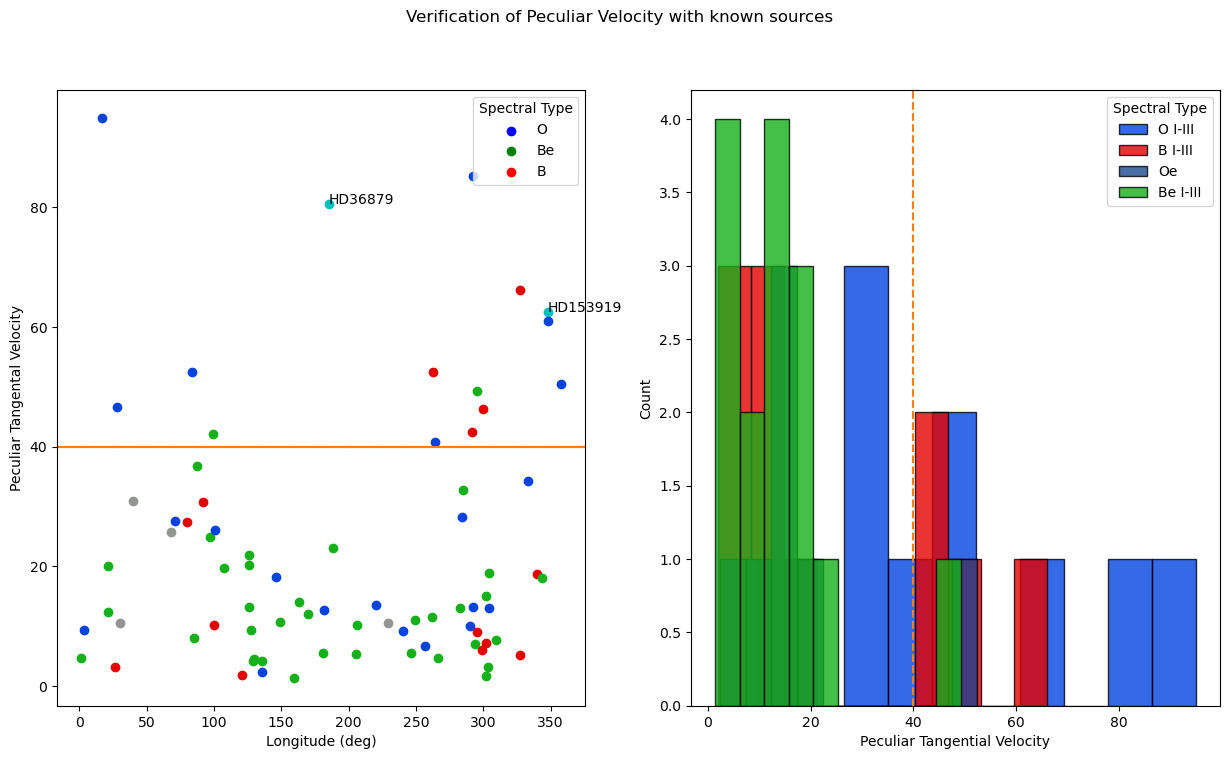

In [61]:
def plot_comparison(table, other_stars,figname):
    large_mask = table['Peculiar Velocity'] <= 400
    table = table[large_mask]
    negative_mask = table['Peculiar Velocity'] >= 0
    table = table[negative_mask]
    prlx_mask = table['parallax']/table['parallax_error'] >=5.0
    table = table[prlx_mask] 
    V_pec = table['Peculiar Velocity']
    long = table['l']
    color = table['SpColor']
    mod_sptype = table['Mod_SpType']
    v_thres = 40 #km/s threshold peculiar velocity
    #mask large ass values in the table
    # large_mask = table['Peculiar Velocity'] <= 400
    # table = table[large_mask]
    other_color = 'c'
    fig, axs = plt.subplots(1,2, figsize=(15,8))
    for i, star in enumerate(other_stars):
        star_v_pec = star['Peculiar Velocity']
        star_long = star['l']
        star_name = str(star['name'].value[0])
        axs[0].scatter(star_long,star_v_pec,c=other_color)
        axs[0].annotate(f'{star_name}',(star_long,star_v_pec))
    for long_data, V_pec_data, color in zip(long, V_pec, color):
        axs[0].scatter(long_data, V_pec_data,c=color)
    axs[0].scatter([], [], color='blue', label='O')
    axs[0].scatter([], [], color='green', label='Be')
    axs[0].scatter([], [], color='red', label='B')

    axs[0].set_xlabel('Longitude (deg)')
    axs[0].set_ylabel("Peculiar Tangental Velocity")
    axs[0].axhline(y=v_thres,color='tab:orange')
    axs[0].legend(title='Spectral Type')
    #axs[0].set_ylim(-200,200)

    #histrogram
    # Filter V_pec values based on star types
    blue_mask = table['SpColor'] == 'blue'
    red_mask = table['SpColor'] == 'red'
    green_mask = table['SpColor'] == 'green'
    
    V_pec_O = table['Peculiar Velocity'][blue_mask]
    V_pec_Be = table['Peculiar Velocity'][green_mask]
    V_pec_B =  table['Peculiar Velocity'][red_mask]
    #print(len(V_pec_O),len(V_pec_Be),len(V_pec_B))
    # Histogram for V_pec based on star type
    bin_size = 10
    for label, types, color in groups:
        V_pec_group = [vel for vel, sp_type in zip(V_pec, mod_sptype) if sp_type in types]
        
        if V_pec_group:
            bins = np.linspace(V_pec_group[0], V_pec_group[-1]).sort()
            axs[1].hist(V_pec_group, bins=bins, alpha=0.8, edgecolor='black', color=color, label=label)
            axs[1].legend()
    axs[0].axhline(y=v_thres, color='tab:orange', linestyle='--')
    axs[1].axvline(x=v_thres, color= 'tab:orange',linestyle='--')
    axs[1].set_ylabel("Count")
    axs[1].set_xlabel('Peculiar Tangential Velocity')
    axs[1].legend(title="Spectral Type")
    fig.suptitle("Verification of Peculiar Velocity with known sources")
    fig.savefig(home_files+'/Figures/'+f'{figname}_{today}.png')
    plt.show()
    return None
list_of_comp_stars = [HD153919, HD3879]
plot_comparison(HMXB_table, list_of_comp_stars,'Verification')

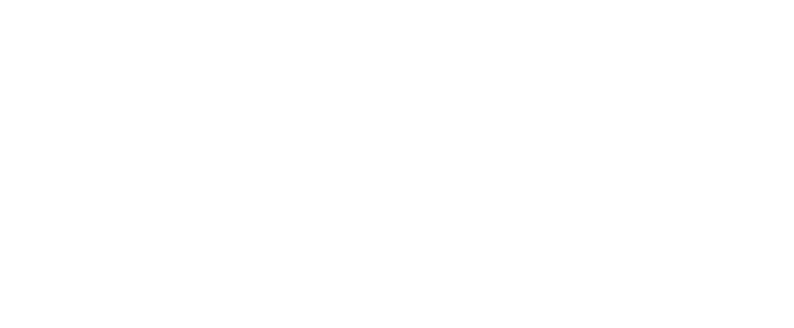

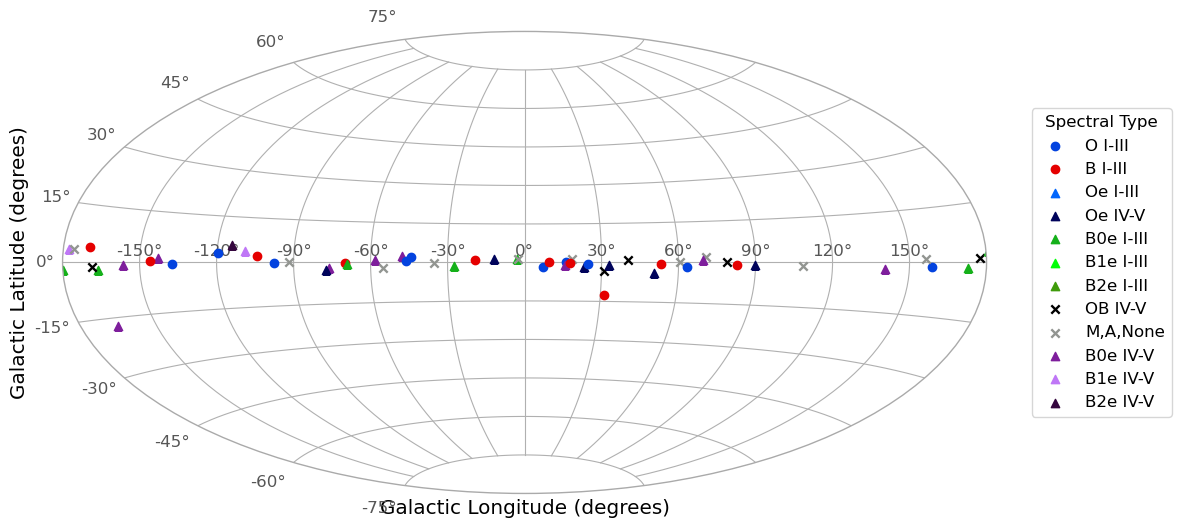

In [62]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
def plot_galactic_map(table,other_stars):
    ''''''
    mod_sptype = table['Mod_SpType']

    gal_l , gal_b= table['l'],table['b']
    
    fig, ax  = plt.subplots(1,figsize=(10,4))
    blue_mask = table['SpColor'] == 'blue'
    red_mask = table['SpColor'] == 'red'
    green_mask = table['SpColor'] == 'green'
    
    l_pec_O = table['l'][blue_mask]
    l_pec_Be = table['l'][green_mask]
    l_pec_B =  table['l'][red_mask]

    b_pec_O = table['b'][blue_mask]
    b_pec_Be = table['b'][green_mask]
    b_pec_B =  table['b'][red_mask]

    #check with HD153919

    plt.axis('off')
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='aitoff')
    for long, lat, sp_type in zip(gal_l, gal_b, mod_sptype):
        color = sp_type if sp_type in color_map else 'xkcd:grey'
        #axs[0].scatter(gal_l,gal_b, c=color)
        marker = marker_map.get(sp_type, 'x') 
        ax.scatter(np.radians(long*180), np.radians(lat),c=color,marker=marker)
    for color, label in color_map.items():
        marker= marker_map.get(color, 'x') 
        ax.scatter([], [], color=color, label=label,marker=marker)

    plt.legend(title='Spectral Type',loc='center left',bbox_to_anchor= (1.04,0.5))
    
    #Set labels for axes
    plt.xlabel('Galactic Longitude (degrees)')
    plt.ylabel('Galactic Latitude (degrees)')
    fig.savefig(home_files+'/Figures/'+f'Galaxy_map_{today}.png')
    ax.grid(True)
    plt.show()
plot_galactic_map(HMXB_table,list_of_comp_stars)   

In [63]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
def plot_galactic_map_with_background(table):
    ''''''
    mod_sptype = table['Mod_SpType']

    gal_l , gal_b= table['l'],table['b']
    
    fig, ax  = plt.subplots(1,figsize=(10,4))
    blue_mask = table['SpColor'] == 'blue'
    red_mask = table['SpColor'] == 'red'
    green_mask = table['SpColor'] == 'green'
    
    l_pec_O = table['l'][blue_mask]
    l_pec_Be = table['l'][green_mask]
    l_pec_B =  table['l'][red_mask]

    b_pec_O = table['b'][blue_mask]
    b_pec_Be = table['b'][green_mask]
    b_pec_B =  table['b'][red_mask]

    #check with HD153919

    plt.axis('off')
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='aitoff')
    for long, lat, sp_type in zip(gal_l, gal_b, mod_sptype):
        color = sp_type if sp_type in color_map else 'xkcd:grey'
        #axs[0].scatter(gal_l,gal_b, c=color)
        marker = marker_map.get(sp_type, 'x') 
        ax.scatter(np.radians(long*180), np.radians(lat),c=color,marker=marker)
    for color, label in color_map.items():
        marker= marker_map.get(color, 'x') 
        ax.scatter([], [], color=color, label=label,marker=marker)

    plt.legend(title='Spectral Type',loc='center left',bbox_to_anchor= (1.04,0.5))
    
    #Set labels for axes
    plt.xlabel('Galactic Longitude (degrees)')
    plt.ylabel('Galactic Latitude (degrees)')
    fig.savefig(home_files+'/Figures/'+f'Galaxy_map_{today}.png')
    ax.grid(True)
    plt.show()

In [64]:
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType,Mod_SpType,SpColor,Mass_compact,M_compact_lower,M_compact_upper,Mass_companion,M_companion_lower,M_companion_upper,Name
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,,,,,,,,,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str17,str10,float64,float64,float64,float64,float64,float64,str23
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,-4.8164893827016515,0.0058944434132315315,B0Ve,xkcd:purple,xkcd:green,--,--,--,--,--,--,4U 0352+309
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,1.8464936849682976,-0.01668983515155678,B0 IVpe,xkcd:purple,xkcd:green,--,--,--,--,--,--,HD 34921
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,0.08538307654964422,-0.07654192085924438,B0e,xkcd:green,xkcd:green,--,--,--,--,--,--,BSD 24-491
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,0.06229471894967609,-0.47301969013360023,B1/2I[e],xkcd:green,xkcd:green,--,--,--,--,--,--,XTE J0421+560
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,-0.9451534592058328,-0.08616626715350759,B1-2 III/Ve,xkcd:green,xkcd:green,--,--,--,--,--,--,TYC 3681-695-1
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,

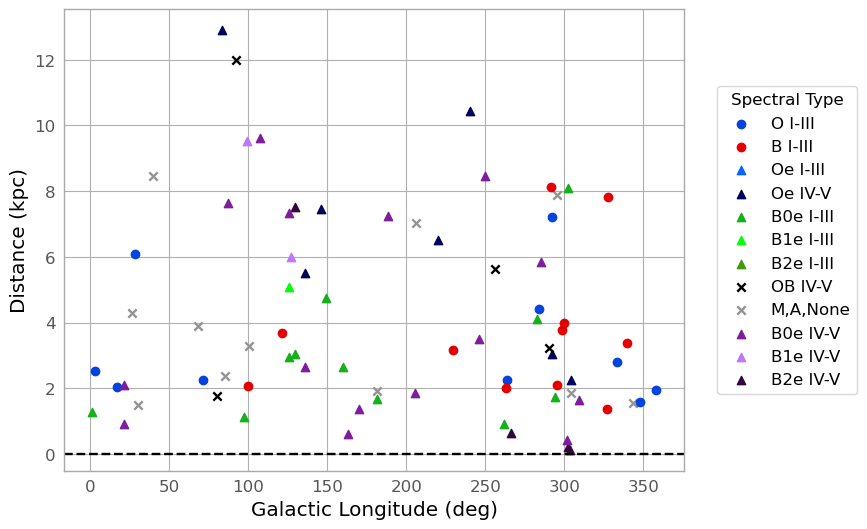

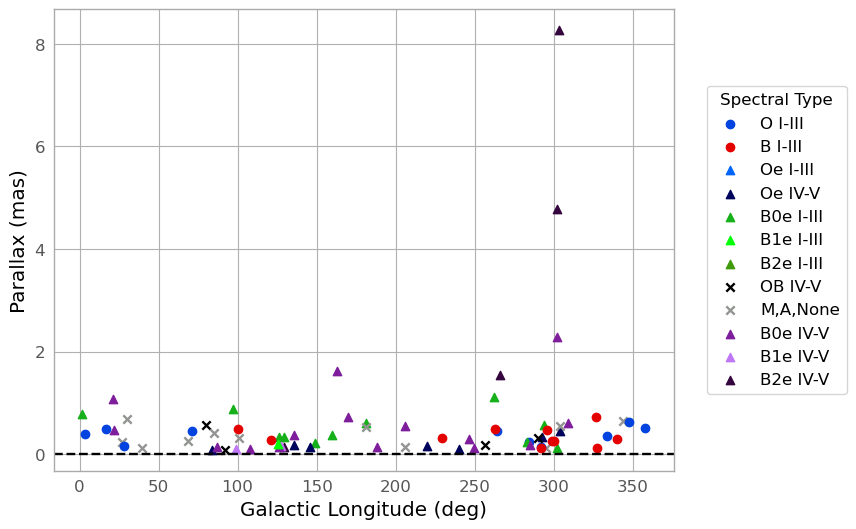

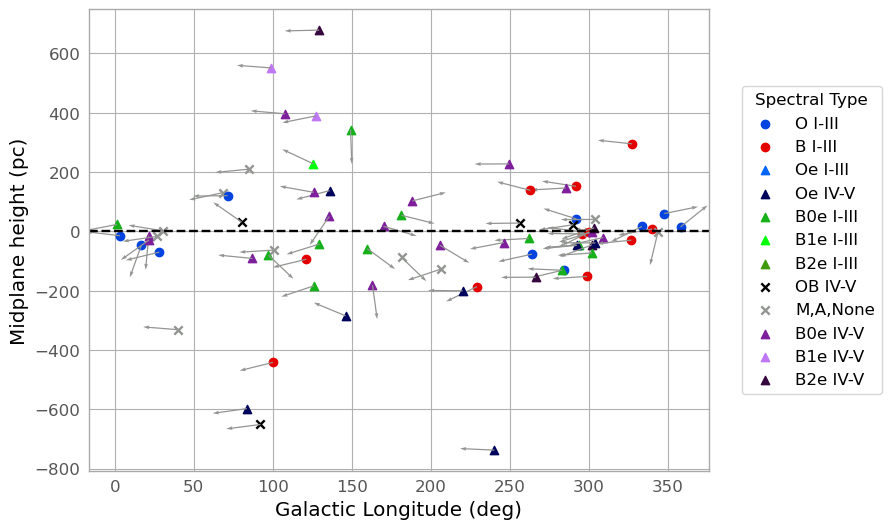

In [67]:
def plot_distances(table):
    prlx_mask = table['parallax']/table['parallax_error'] >=5.0
    table = table[prlx_mask]
    parallax =table['parallax']
    dist = table['distance']
    long = table['l']
    lat = table['b']
    pec_mu_l = table['peculiar_mu_l']
    pec_mu_b = table['peculiar_mu_b']
    height = dist*np.sin(np.radians(lat))
    #also add peculiar vector
    pm_mu_l = table['pm_l_poleski']
    pm_mu_b = table['pm_b_poleski']
    mod_sptype = table['Mod_SpType']

    #distance  
    for l,d, sp_type in zip(long,dist, mod_sptype):
        color = sp_type if sp_type in color_map else 'xkcd:grey'
        #axs[0].scatter(gal_l,gal_b, c=color)
        marker = marker_map.get(sp_type, 'x') 
        plt.scatter(l,d,c=color,marker=marker)
    for color, label in color_map.items():
        marker= marker_map.get(color, 'x') 
        plt.scatter([], [], color=color, label=label,marker=marker)
    plt.legend(title='Spectral Type',loc='center left',bbox_to_anchor= (1.04,0.5))
    plt.axhline(y=0, color= 'xkcd:black',linestyle='--')
    plt.xlabel('Galactic Longitude (deg)')
    plt.ylabel('Distance (kpc)')
    plt.savefig(home_files+"/Figures/"+f"distance_{today}.png",bbox_inches='tight')
    plt.show()

    #parllax 
    for l,p, sp_type in zip(long,parallax, mod_sptype):
        color = sp_type if sp_type in color_map else 'xkcd:grey'
        #axs[0].scatter(gal_l,gal_b, c=color)
        marker = marker_map.get(sp_type, 'x') 
        plt.scatter(l,p,c=color,marker=marker)
    for color, label in color_map.items():
        marker= marker_map.get(color, 'x') 
        plt.scatter([], [], color=color, label=label,marker=marker)
    lgd = plt.legend(title='Spectral Type',loc='center left',bbox_to_anchor= (1.04,0.5))
    plt.axhline(y=0, color= 'xkcd:black',linestyle='--')
    plt.xlabel('Galactic Longitude (deg)')
    plt.ylabel('Parallax (mas)')
    #plt.tight_layout()
    plt.savefig(home_files+"/Figures/"+f"parallax_{today}.png",bbox_inches='tight')
    plt.show()
    # height
    
    for l,z, sp_type, pec_l, pec_b,pm_l,pm_b in zip(long,height, mod_sptype,pec_mu_l,pec_mu_b,pm_mu_l,pm_mu_b):
        color = sp_type if sp_type in color_map else 'xkcd:grey'
        marker = marker_map.get(sp_type, 'x') 
        #kpc to pc
        plt.scatter(l,z*1000,c=color,marker=marker)
        #peciliar
        #plt.quiver(l,z*1000,pec_l, pec_b,color='xkcd:black',angles='uv',width=0.002)
        #observed
        plt.quiver(l,z*1000, pm_l, pm_b, color='xkcd:grey',angles='uv',width=0.002)
    for color, label in color_map.items():
        marker= marker_map.get(color, 'x') 
        plt.scatter([], [], color=color, label=label,marker=marker)
    plt.legend(title='Spectral Type',loc='center left',bbox_to_anchor= (1.04,0.5))
    plt.axhline(y=0, color= 'xkcd:black',linestyle='--')
    plt.xlabel('Galactic Longitude (deg)')
    plt.ylabel('Midplane height (pc)')
    plt.savefig(home_files+"/Figures/"+f"height_{today}.png",bbox_inches='tight')
    plt.show()

    
    return None
plot_distances(HMXB_table)
    


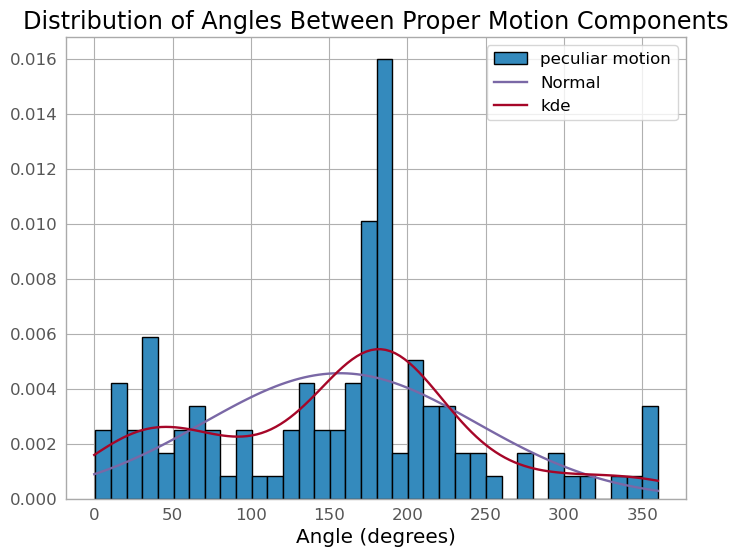

In [69]:
from scipy import stats
def bimodal(x,sigma):
    return None
def make_angle_distribution(table):
    #peculiar motion
    pec_mu_l = table['peculiar_mu_l']
    pec_mu_b = table['peculiar_mu_b']

    #proper motion
    pm_b = table['pm_b_poleski']
    pm_l = table['pm_l_poleski']
    
    pm_theta = np.arctan2(pm_b,pm_l) #radians
    pm_theta = np.degrees(pm_theta)
    pm_theta_list = []
    
    for deg in pm_theta:
        if deg <0:
            deg += 360
        pm_theta_list.append(deg)

    
    pec_theta = np.arctan2(pec_mu_b,pec_mu_l) #radians
    pec_theta = np.degrees(pec_theta)
    pec_theta_list = []

    for deg in pec_theta:
        if deg <0:
            deg += 360
        pec_theta_list.append(deg)
    #degrees per bin
    degbins = 10
    n_bins = 360/degbins

    #convert to numpy array
    pm_theta_list = np.array(pm_theta_list)
    pec_theta_list = np.array(pec_theta_list)
    
    #mask nans
    pec_theta_list = pec_theta_list[~np.isnan(pec_theta_list)]
    pm_theta_list = pm_theta_list[~np.isnan(pm_theta_list)]
    plt.hist(pec_theta_list, bins=int(n_bins), edgecolor='black',label='peculiar motion',density=True)

    #make a model fit
    xt = plt.xticks()[0]  
    xmin, xmax = 0, 360
    lnspc = np.linspace(xmin, xmax, len(pec_theta_list))
    mean, std = np.nanmean(pec_theta_list), np.nanstd(pec_theta_list)
    pec_norm_pdf= stats.norm.pdf(lnspc, mean,std)
    
    pec_kde_pdf = stats.gaussian_kde(pec_theta_list)
    kde_vals = pec_kde_pdf(lnspc)
    
    plt.plot(lnspc,pec_norm_pdf,label='Normal')
    plt.plot(lnspc, kde_vals,label='kde')
    #plt.hist(pm_theta_list, bins=int(n_bins), edgecolor='black', alpha=0.8,label='Proper motion',density=True)
    plt.legend()
    
    plt.xlabel('Angle (degrees)')
    #plt.ylabel('Frequency')
    plt.title('Distribution of Angles Between Proper Motion Components')
    plt.show()
        
    return pm_theta
x= make_angle_distribution(HMXB_table)

# Find missing grey stars

In [70]:
grey_stars_mask = HMXB_table['Mod_SpType'] == 'xkcd:grey'
grey_stars = HMXB_table[grey_stars_mask]
grey_stars

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType,Mod_SpType,SpColor,Mass_compact,M_compact_lower,M_compact_upper,Mass_companion,M_companion_lower,M_companion_upper,Name
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,,,,,,,,,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str17,str10,float64,float64,float64,float64,float64,float64,str23
2034031438383765760,298.92639832142635,0.016134035,32.096930318736355,0.021289147,-2.158047594075068,0.020837534,-6.0711257533713265,0.025808768,0.2575299882811361,0.024460983,4.7357154,0.5058494,8.358267,68.39194055158187,1.9268933031575586,10.154337,7.0887012,3.0656357,3.883042928997987,-6.299409845170768,-1.3539471681374267,7.938233392017621,222.65737986150353,219.5394873301689,0.27343567863283635,-0.3823189828459564,-5.535157326562214,-0.026443061620073316,25.8346494643923,-1.0376881972413905,-0.9451851236713971,M4 I,xkcd:grey,xkcd:grey,--,--,--,--,--,--,4U 1954+31
4070770243676311936,269.64397104543735,0.27038908,-21.389332109203,0.19027168,-2.36538712986673,0.35116014,-3.810504961475337,0.23855187,0.133383862286102,0.22734681,nan,nan,18.813751,7.98621486794217,1.3265957398942791,21.803795,16.990738,4.813057,7.497158823119456,-4.48255485892972,0.14733048650189942,1.498492801223773,208.60088857803177,164.05388864896224,-0.336769051038998,-0.20560835312110332,-2.3205707284963797,-0.09304067271899781,66.76999438830356,-1.8252150793943418,0.44597951234200056,--,xkcd:grey,xkcd:grey,--,--,--,--,--,--,IGR J17586-2129
4146789141900648576,271.1624089614886,0.23183206,-14.9464336382636,0.19731422,2.8163949695952675,0.32420734,0.5248669367618788,0.21428205,0.35637339844069704,0.25637776,nan,nan,19.099766,14.30687793079159,3.2517753399711236,20.119614,17.970112,2.1495018,2.806045581335406,1.8355272451174276,-2.1996376198135343,5.8266333265296195,219.9798410776547,78.64461590254733,-0.7901388439244128,-0.5115169832121619,-0.6001550369069051,-0.10637875014533071,47.78588904284989,3.2258211259487455,-1.581741886456042,--,xkcd:grey,xkcd:grey,--,--,--,--,--,--,IGR J18048-1455
4156747212545110400,278.8576017596259,2.8617914,-7.614004545977431,2.1571057,nan,nan,nan,nan,nan,nan,nan,nan,20.38705,24.33602586714134,0.06569920978307321,22.341728,18.35192,3.989809,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M5III-V,xkcd:grey,xkcd:grey,--,--,--,--,--,--,Sct X-1
4259088994635370752,281.5533010323846,0.093761496,-2.3739097448759168,0.09704078,-1.6014907067769724,0.11734643,-2.1504326332738555,0.10132134,0.6764355935672552,0.12099661,nan,nan,17.650904,30.22372840554395,0.07923084081716135,19.002638,16.482925,2.5197124,1.47833734580168,-2.6462259339821044,0.43199687552420307,7.260854633856697,221.88178273714763,129.67081863414768,-0.9011752611325748,-1.0813866686293439,-1.7625919571595623,-0.0037296741201519835,10.631606887201402,0.01754128431003288,1.5171132182736988,--,xkcd:grey,xkcd:grey,--,--,--,0.94908106,0.90901417,0.9890868,IGR J18462-0223
4293406612283985024,287.9565063699124,0.01839638,4.982708527256882,0.018368214,-3.0269258944121806,0.023585632,-4.776844591679762,0.023861438,0.11817711247763943,0.023269137,nan,nan,12.602749,39.69407310529392,-2.244594208819768,14.155096,11.391598,2.7634983,8.461875392235635,-5.637365080515104,0.4479280883268187,5.756678671628887,219.87592293242025,205.8253763529911,-0.08892951650408813,-0.205933379

# Simbad Query

In [71]:
Simbad.add_votable_fields('sp_type')
grey_simbad =['GAIA DR3 ' + str(source_id) for source_id in grey_stars['source_id']]
grey_simbad

['GAIA DR3 2034031438383765760',
 'GAIA DR3 4070770243676311936',
 'GAIA DR3 4146789141900648576',
 'GAIA DR3 4156747212545110400',
 'GAIA DR3 4259088994635370752',
 'GAIA DR3 4293406612283985024',
 'GAIA DR3 5980409632300781056',
 'GAIA DR3 6054778507172454912']

# Run this twice, it works

In [73]:

result_table = Simbad.query_objects(grey_simbad)
result_table

main_id,ra,dec,coo_err_maj,coo_err_min,coo_err_angle,coo_wavelength,coo_bibcode,sp_type,user_specified_id,object_number_id
,deg,deg,mas,mas,deg,,,,,
object,float64,float64,float32,float32,int16,str1,object,object,object,int64
DO 18341,298.9264096433,32.09695730152,0.0161,0.0213,90,O,2020yCat.1350....0G,M4/5III,GAIA DR3 2034031438383765760,1
IGR J17586-2129,269.64398233591,-21.38931517363,0.2704,0.1903,90,O,2020yCat.1350....0G,,GAIA DR3 4070770243676311936,2
,--,--,--,--,--,,,,GAIA DR3 4146789141900648576,3
X Sct X-1,278.8576017596299,-7.61400454598,2.8618,2.1571,90,O,2020yCat.1350....0G,,GAIA DR3 4156747212545110400,4
2MASS J18461279-0222261,281.55330815623,-2.3739001874,0.0938,0.097,90,O,2020yCat.1350....0G,,GAIA DR3 4259088994635370752,5
SS 433,287.95651987395,4.982729757679999,0.0184,0.0184,90,O,2020yCat.1350....0G,A7Ib,GAIA DR3 4293406612283985024,6
,--,--,--,--,--,,,,GAIA DR3 5980409632300781056,7
2MASS J12340051-6143034,188.50215027951455,-61.71762302806139,0.0459,0.0463,90,O,2020yCat.1350....0G,,GAIA DR3 6054778507172454912,8


In [ ]:
#help(Simbad.add_votable_fields)
# import astroquery.simbad
# help(astroquery.simbad.SimbadClass.list_votable_fields)

In [91]:
result_table.write(home_files+'Greystars_type.csv',format='ascii.csv',overwrite=True)

# Be Stars
Find all the Be stars and hopefully their spin periods

In [75]:
Bestars_color_mask =HMXB_table['SpColor'] =='xkcd:green'
Bestars = HMXB_table[Bestars_color_mask]
Bestars

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType,Mod_SpType,SpColor,Mass_compact,M_compact_lower,M_compact_upper,Mass_companion,M_companion_lower,M_companion_upper,Name
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,,,,,,,,,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str17,str10,float64,float64,float64,float64,float64,float64,str23
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,-4.8164893827016515,0.0058944434132315315,B0Ve,xkcd:purple,xkcd:green,--,--,--,--,--,--,4U 0352+309
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,1.8464936849682976,-0.01668983515155678,B0 IVpe,xkcd:purple,xkcd:green,--,--,--,--,--,--,HD 34921
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,0.08538307654964422,-0.07654192085924438,B0e,xkcd:green,xkcd:green,--,--,--,--,--,--,BSD 24-491
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,0.06229471894967609,-0.47301969013360023,B1/2I[e],xkcd:green,xkcd:green,--,--,--,--,--,--,XTE J0421+560
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,-0.9451534592058328,-0.08616626715350759,B1-2 III/Ve,xkcd:green,xkcd:green,--,--,--,--,--,--,TYC 3681-695-1
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,

In [76]:
Bestars_id = Table(Bestars['source_id'])
                   
#Bestars_id.write('Be_gaia_id.txt',format='ascii.no_header',overwrite=True)

In [77]:
Bestars_id_pandas = Bestars_id.to_pandas()

In [78]:
Bestars_id_pandas.values

array([[ 168450545792009600,  184497471323752064,  252878401557369088,
         276644757710014976,  414196617287885312,  426558460884582016,
         465645515129855872,  511220031584305536,  518990967445248256,
         519352324516039680,  524677469790488960,  524924310153249920,
        1979911002134040960, 2028089540103670144, 2031939548802102656,
        2063791369815322752, 2070085317968809216, 2083644392294059520,
        2162805896614571904, 2178178409188167296, 2201091578667140352,
        2207277877757956352, 3131755947406031104, 3131822364779745536,
        3423526544838563328, 3431561565357225088, 4060784345959549184,
        4155000844481174656, 4155023796790984064, 4268774695647764352,
        4278536022438800640, 4310118570535453696, 4323316622779495680,
        4512787627579740032, 5258414192353423360, 5259009543533179648,
        5311384333263075840, 5333660129603575808, 5334851450481641088,
        5335021664274920576, 5352018121173519488, 5489434710755238400,
      

In [79]:
with open('TAP_UPLOAD.Be_gaia_id.txt', "w") as f:
    for value in Bestars_id_pandas.values:
        f.write(f"{value}\n")

# Catalog of Xray Binaries
https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A+A/671/A149


In [81]:
Be_spin_sudo_match = ascii.read(home_files+'Be_spin_match.csv',format='csv')

In [84]:
Be_spin_sudo_match["GaiaDR3"].name = 'source_id'

In [85]:
#mask misisng values
Be_spin_sudo_match = Be_spin_sudo_match[~Be_spin_sudo_match['source_id'].mask]
Bestars = join(Bestars, Be_spin_sudo_match, keys='source_id', join_type='left')

# Match the data based on DR3 identifer

In [86]:
Bestars = Table(Bestars)
Bestars

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,peculiar_mu_l,peculiar_mu_b,SpType,Mod_SpType,SpColor,Mass_compact,M_compact_lower,M_compact_upper,Mass_companion,M_companion_lower,M_companion_upper,Name,Mx,PerSpin,e_PerSpin,Per,e_Per
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr,,,,,,,,,,,,,,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str17,str10,float64,float64,float64,float64,float64,float64,str23,float64,float64,float64,float64,float64
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,-4.8164893827016515,0.0058944434132315315,B0Ve,xkcd:purple,xkcd:green,--,--,--,--,--,--,4U 0352+309,--,837.6712,0.0003,250.3,0.6
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,1.8464936849682976,-0.01668983515155678,B0 IVpe,xkcd:purple,xkcd:green,--,--,--,--,--,--,HD 34921,--,--,--,--,--
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,0.08538307654964422,-0.07654192085924438,B0e,xkcd:green,xkcd:green,--,--,--,--,--,--,BSD 24-491,--,202.5,0.5,150.0,--
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,0.06229471894967609,-0.47301969013360023,B1/2I[e],xkcd:green,xkcd:green,--,--,--,--,--,--,XTE J0421+560,--,--,--,19.41,0.02
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,-0.9451534592058328,-0.08616626715350759,B1-2 III/Ve,xkcd:green,xkcd:green,--,--,--

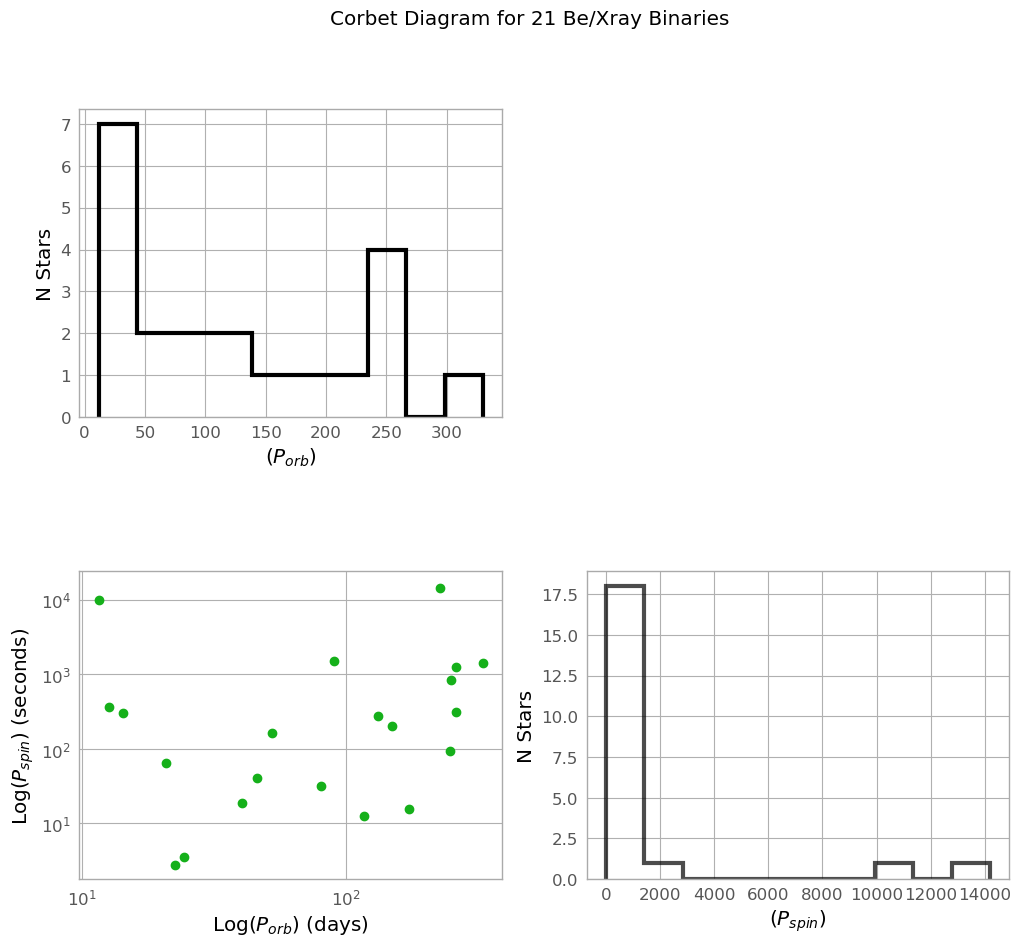

In [88]:
def period_spinperiod(table):
    orb_period = table['Per'] #days
    orb_period_err = table['e_Per'] #days
    spin_period = table['PerSpin'] # seconds
    spin_period_err = table['e_PerSpin']

    mod_sptype = table['Mod_SpType']
    color_map = {
        "xkcd:blue": "O I-III",
        "xkcd:red": "B I-III",
        "xkcd:Bright Blue": "Oe I-III",
        "xkcd:dark blue": "Oe IV-V",
        "xkcd:green": "B0e I-III",
        "xkcd:bright green": "B1e I-III",
        "xkcd:grass green": "B2e I-III",
        "xkcd:black": "OB IV-V",
        "xkcd:grey": "M,A,None",
        "xkcd:purple": "B0e IV-V",
        "xkcd:light purple": "B1e IV-V",
        "xkcd:dark purple": "B2e IV-V",
    }
    groups = [
        ("O I-III", ['xkcd:blue'], 'xkcd:blue'),
        ("B I-III", ['xkcd:red'], 'xkcd:red'),
        ("Oe", ['xkcd:Bright Blue', 'xkcd:dark blue'], 'xkcd:cobalt'),
        ("Be I-III", ['xkcd:green', 'xkcd:bright green', 'xkcd:dark green'], 'xkcd:green')
    ]
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    axs[0, 1].axis('off')

    #only plot the data with complete points
    orb_spin_hist = table[~orb_period.mask & ~spin_period.mask]
    masked_orb = orb_spin_hist['Per']
    masked_spin = orb_spin_hist['PerSpin']
    data = np.array([masked_orb,masked_spin]).T
    
    orb_logbins = np.sort(np.logspace(np.log10(masked_orb[0]),np.log10(masked_orb[-1]),len(masked_orb)))
    orb_bins = np.sort(np.linspace(masked_orb[0],masked_orb[-1],len(masked_orb)))
    
    axs[0,0].hist(masked_orb,histtype='step',linewidth=3.0,color='xkcd:black')
    axs[0,0].set_xlabel(r'$(P_{orb})$')
    axs[0,0].set_ylabel('N Stars')
    #axs[0,0].set_title("Histogram of Orbital Period")
    #axs[0,0].set_xscale('log')

    axs[1,0].errorbar(orb_period,spin_period,spin_period_err,orb_period_err,ecolor='k',fmt='o',color='xkcd:green')
    axs[1,0].set_xscale('log')
    axs[1,0].set_yscale('log')
    axs[1,0].set_xlabel(r'Log($P_{orb}$) (days)')
    axs[1,0].set_ylabel(r'Log($P_{spin}$) (seconds)')

    spin_logbins = np.sort(np.logspace(np.log10(masked_spin[0]),np.log10(masked_spin[-1]),len(masked_spin)))
    spin_bins = np.sort(np.linspace(masked_spin[0],masked_spin[-1],len(masked_spin)))
    
    axs[1,1].hist(masked_spin,alpha=0.7,color='xkcd:black',histtype='step',linewidth=3.0,)
    axs[1,1].set_xlabel((r'$(P_{spin})$'))
    axs[1,1].set_ylabel('N Stars')
    #axs[1,1].set_title("Histogram of Spin Period ")
   # axs[1,1].set_xscale('log')

    #corner.corner(data, labels=["alpha", "delta"], show_titles=True, fig=fig)
    #plot N points
    N = np.sum(~orb_period.mask & ~spin_period.mask)
    orb_spin_hist = table[~orb_period.mask & ~spin_period.mask]
    fig.suptitle(f'Corbet Diagram for {N} Be/Xray Binaries')

    masked_orb = np.log10(orb_spin_hist['Per'])
    masked_spin = np.log10(orb_spin_hist['PerSpin'])
    data = np.array([masked_orb,masked_spin]).T

    fig.savefig(home_files+"/Figures/"+f"Corbet_{today}.png")
    
    return None
period_spinperiod(Bestars)

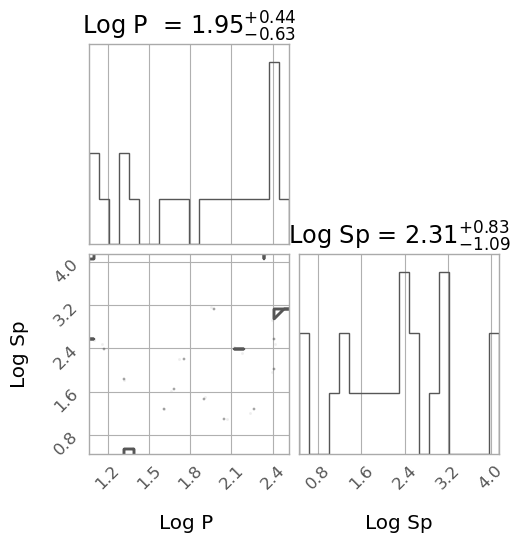

In [89]:
def make_corbet_corner(table):
    '''Make a corner plot of a corbet diagram'''
    orb_period = table['Per'] #days
    orb_period_err = table['e_Per'] #days
    spin_period = table['PerSpin'] # seconds
    spin_period_err = table['e_PerSpin']
    orb_spin_hist = table[~orb_period.mask & ~spin_period.mask]
    masked_orb = np.log10(orb_spin_hist['Per'])
    masked_spin = np.log10(orb_spin_hist['PerSpin'])
    data = np.array([masked_orb,masked_spin]).T
    labels = ["Log P ", "Log Sp"]
    # corbet = corner.corner(
    #     data, 
    #     labels=labels, 
    #     show_titles=True, 
    #     title_fmt=".2f",
    #     #quantiles=[0.16, 0.5, 0.84], 
    #     plot_datapoints=True,
    #     #fill_contours=True,
    #     color="green",
    #     hist_kwargs={"color": "black",}
    # )
    fig = corner.corner(data, labels=labels, show_titles=True, 
                    plot_density=False,plot_datapoints=True)

    return None
make_corbet_corner(Bestars)